In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import warnings
import itertools
from math import sqrt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults

In [2]:
series = pd.read_csv('water.csv', header=0, index_col=0, parse_dates=True)
series

,Water
Year,
1885-01-01,356
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
...,...
1959-01-01,594
1960-01-01,587
1961-01-01,587


<AxesSubplot:xlabel='Year'>

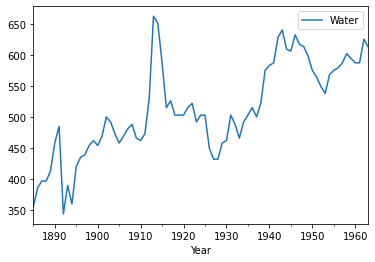

In [3]:
# line plot of time series
series.plot()

array([[<AxesSubplot:title={'center':'Water'}>]], dtype=object)

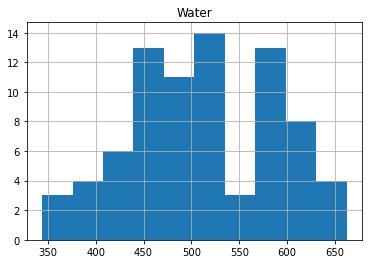

In [4]:
series.hist()

<AxesSubplot:ylabel='Density'>

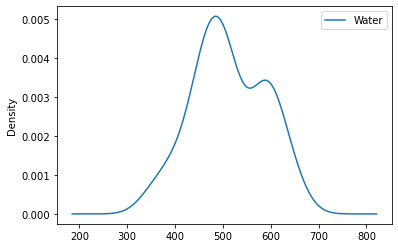

In [5]:
series.plot(kind='kde')

In [6]:
# separate out a validation dataset
split_point = len(series) - 10

dataset, validation = series[0:split_point], series[split_point:]

print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 69, Validation 10


#### Persistence/ Base model

In [7]:
# evaluate a persistence model
# load data
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\2746187420.py:3: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1885-01-01    356
1886-01-01    386
1887-01-01    397
1888-01-01    397
1889-01-01    413
             ... 
1949-01-01    598
1950-01-01    575
1951-01-01    564
1952-01-01    549
1953-01-01    538
Name: 1, Length: 69, dtype: int64

In [8]:
# prepare data
X = train.values
X

array([356, 386, 397, 397, 413, 458, 485, 344, 390, 360, 420, 435, 439,
       454, 462, 454, 469, 500, 492, 473, 458, 469, 481, 488, 466, 462,
       473, 530, 662, 651, 587, 515, 526, 503, 503, 503, 515, 522, 492,
       503, 503, 450, 432, 432, 458, 462, 503, 488, 466, 492, 503, 515,
       500, 522, 575, 583, 587, 628, 640, 609, 606, 632, 617, 613, 598,
       575, 564, 549, 538], dtype=int64)

In [9]:
X = X.astype('float32')
X

array([356., 386., 397., 397., 413., 458., 485., 344., 390., 360., 420.,
       435., 439., 454., 462., 454., 469., 500., 492., 473., 458., 469.,
       481., 488., 466., 462., 473., 530., 662., 651., 587., 515., 526.,
       503., 503., 503., 515., 522., 492., 503., 503., 450., 432., 432.,
       458., 462., 503., 488., 466., 492., 503., 515., 500., 522., 575.,
       583., 587., 628., 640., 609., 606., 632., 617., 613., 598., 575.,
       564., 549., 538.], dtype=float32)

In [10]:
train_size = int(len(X) * 0.50)
train_size

34

In [11]:
train, test = X[0:train_size], X[train_size:]

In [12]:
train

array([356., 386., 397., 397., 413., 458., 485., 344., 390., 360., 420.,
       435., 439., 454., 462., 454., 469., 500., 492., 473., 458., 469.,
       481., 488., 466., 462., 473., 530., 662., 651., 587., 515., 526.,
       503.], dtype=float32)

In [13]:
test

array([503., 503., 515., 522., 492., 503., 503., 450., 432., 432., 458.,
       462., 503., 488., 466., 492., 503., 515., 500., 522., 575., 583.,
       587., 628., 640., 609., 606., 632., 617., 613., 598., 575., 564.,
       549., 538.], dtype=float32)

In [14]:
# walk-forward validation
history = [x for x in train]
history

[356.0,
 386.0,
 397.0,
 397.0,
 413.0,
 458.0,
 485.0,
 344.0,
 390.0,
 360.0,
 420.0,
 435.0,
 439.0,
 454.0,
 462.0,
 454.0,
 469.0,
 500.0,
 492.0,
 473.0,
 458.0,
 469.0,
 481.0,
 488.0,
 466.0,
 462.0,
 473.0,
 530.0,
 662.0,
 651.0,
 587.0,
 515.0,
 526.0,
 503.0]

In [15]:
predictions = list()

for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
    
    # observation
    obs = test[i]
    history.append(obs)
    
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

>Predicted=503.000, Expected=503.000
>Predicted=503.000, Expected=503.000
>Predicted=503.000, Expected=515.000
>Predicted=515.000, Expected=522.000
>Predicted=522.000, Expected=492.000
>Predicted=492.000, Expected=503.000
>Predicted=503.000, Expected=503.000
>Predicted=503.000, Expected=450.000
>Predicted=450.000, Expected=432.000
>Predicted=432.000, Expected=432.000
>Predicted=432.000, Expected=458.000
>Predicted=458.000, Expected=462.000
>Predicted=462.000, Expected=503.000
>Predicted=503.000, Expected=488.000
>Predicted=488.000, Expected=466.000
>Predicted=466.000, Expected=492.000
>Predicted=492.000, Expected=503.000
>Predicted=503.000, Expected=515.000
>Predicted=515.000, Expected=500.000
>Predicted=500.000, Expected=522.000
>Predicted=522.000, Expected=575.000
>Predicted=575.000, Expected=583.000
>Predicted=583.000, Expected=587.000
>Predicted=587.000, Expected=628.000
>Predicted=628.000, Expected=640.000
>Predicted=640.000, Expected=609.000
>Predicted=609.000, Expected=606.000
>

In [16]:
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 21.975


#### ARIMA Hyperparameters

In [17]:
# grid search ARIMA parameters for a time series
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE

def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    
    # make predictions
    predictions = list()
    for i in range(len(test)):
        model = ARIMA(history, order = arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[i])
    
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse

#### Grid search for p,d,q values

In [20]:
# evaluate combinations of p, d and q values for an ARIMA model

def evaluate_models(dataset, p_values, d_values, q_values):
    
    dataset = dataset.astype('float32')
    
    best_score, best_cfg = float('inf'), None
    
    for p,d,q in itertools.product(p_values, d_values, q_values):
    #for p in p_values:
    #    for d in d_values:
    #        for q in q_values:
    
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE=%.3f' % (best_cfg, best_score))

In [19]:
'''
L1 = [1,2,3,4,5]
L2 = ['A','B','C']
L3 = [9,8,7]

for x,y,z in itertools.product(L1,L2,L3):
    print(x,y,z)
'''

"\nL1 = [1,2,3,4,5]\nL2 = ['A','B','C']\nL3 = [9,8,7]\n\nfor x,y,z in itertools.product(L1,L2,L3):\n    print(x,y,z)\n"

In [21]:
# load dataset
train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
train

C:\Users\Admin\AppData\Local\Temp\ipykernel_9428\240493752.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  train = pd.read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)


0
1885-01-01    356
1886-01-01    386
1887-01-01    397
1888-01-01    397
1889-01-01    413
             ... 
1949-01-01    598
1950-01-01    575
1951-01-01    564
1952-01-01    549
1953-01-01    538
Name: 1, Length: 69, dtype: int64

In [22]:
# evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)

In [23]:
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=76.755
ARIMA(0, 0, 1) RMSE=47.347
ARIMA(0, 0, 2) RMSE=36.030
ARIMA(0, 0, 3) RMSE=32.537
ARIMA(0, 0, 4) RMSE=29.516
ARIMA(0, 1, 0) RMSE=21.975
ARIMA(0, 1, 1) RMSE=21.907
ARIMA(0, 1, 2) RMSE=22.178
ARIMA(0, 1, 3) RMSE=24.731
ARIMA(0, 1, 4) RMSE=24.844
ARIMA(0, 2, 0) RMSE=28.992
ARIMA(0, 2, 1) RMSE=22.314
ARIMA(0, 2, 2) RMSE=22.196
ARIMA(0, 2, 3) RMSE=22.356
ARIMA(0, 2, 4) RMSE=28.511
ARIMA(0, 3, 0) RMSE=47.939
ARIMA(0, 3, 1) RMSE=29.337
ARIMA(0, 3, 2) RMSE=23.562
ARIMA(0, 3, 3) RMSE=23.343
ARIMA(0, 3, 4) RMSE=23.515
ARIMA(0, 4, 0) RMSE=86.689
ARIMA(0, 4, 1) RMSE=48.469
ARIMA(0, 4, 2) RMSE=30.388
ARIMA(0, 4, 3) RMSE=27.267
ARIMA(0, 4, 4) RMSE=26.285
ARIMA(1, 0, 0) RMSE=23.957
ARIMA(1, 0, 1) RMSE=23.991
ARIMA(1, 0, 2) RMSE=25.384
ARIMA(1, 0, 3) RMSE=25.059
ARIMA(1, 0, 4) RMSE=25.109
ARIMA(1, 1, 0) RMSE=21.921
ARIMA(1, 1, 1) RMSE=21.879
ARIMA(1, 1, 2) RMSE=23.314
ARIMA(1, 1, 3) RMSE=24.816
ARIMA(1, 1, 4) RMSE=27.238
ARIMA(1, 2, 0) RMSE=27.464
ARIMA(1, 2, 1) RMSE=22.219
A

#### Build Model based on the optimized values

In [24]:
# save finalized model to file
# load data
train = pd.read_csv('dataset.csv', header=0, index_col=0, parse_dates=True)
train

,356
1885-01-01,
1886-01-01,386
1887-01-01,397
1888-01-01,397
1889-01-01,413
1890-01-01,458
...,...
1949-01-01,598
1950-01-01,575
1951-01-01,564


In [25]:
# prepare data
X = train.values
X = X.astype('float32')

In [26]:
# fit model
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps = 10)
forecast

array([538.9725347 , 540.09627575, 540.05186744, 539.93956348,
       539.93882113, 539.94980923, 539.95038115, 539.94932872,
       539.94922479, 539.94932336])

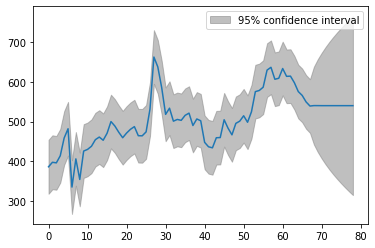

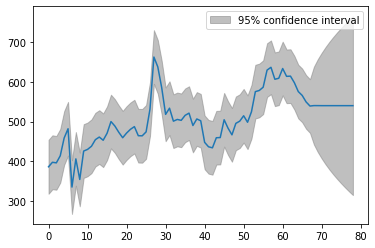

In [27]:
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,79)
#model_fit.plot_predict(1, 79)

In [28]:
#Error on the test data
val = pd.read_csv('validation.csv', header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

54.37185530298613

#### Combine train and test data and build final model

In [29]:
# fit model
data = pd.read_csv('water.csv', header=0, index_col=0, parse_dates=True)

# prepare data
X = train.values
X = X.astype('float32')

In [30]:
model = ARIMA(X, order=(2,1,0))
model_fit = model.fit()

In [31]:
forecast=model_fit.forecast(steps=10)
forecast

array([538.9725347 , 540.09627575, 540.05186744, 539.93956348,
       539.93882113, 539.94980923, 539.95038115, 539.94932872,
       539.94922479, 539.94932336])

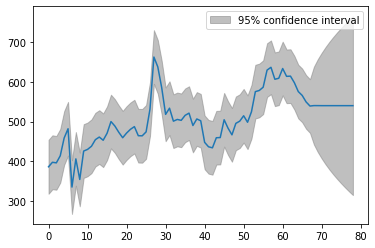

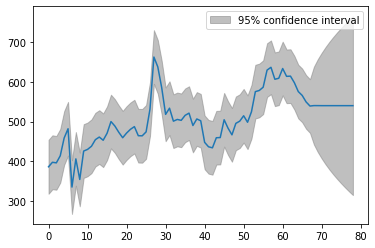

In [32]:
#model_fit.plot_predict(1,90)
from statsmodels.graphics.tsaplots import plot_predict
plot_predict(model_fit,1,79)